<a href="https://colab.research.google.com/github/hrbae/Industrial_Data_Science/blob/main/Code/13_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EB%A7%88%EC%9D%B4%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 47.8 MB/s 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import pandas as pd
from konlpy.tag import Twitter 

import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdriv


In [ ]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Data'))

FileNotFoundError: ignored

In [ ]:
news = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/News.csv", encoding='utf-8')
print(news.columns)

In [ ]:
news['본문'][0:10]

# 자연어처리 절차

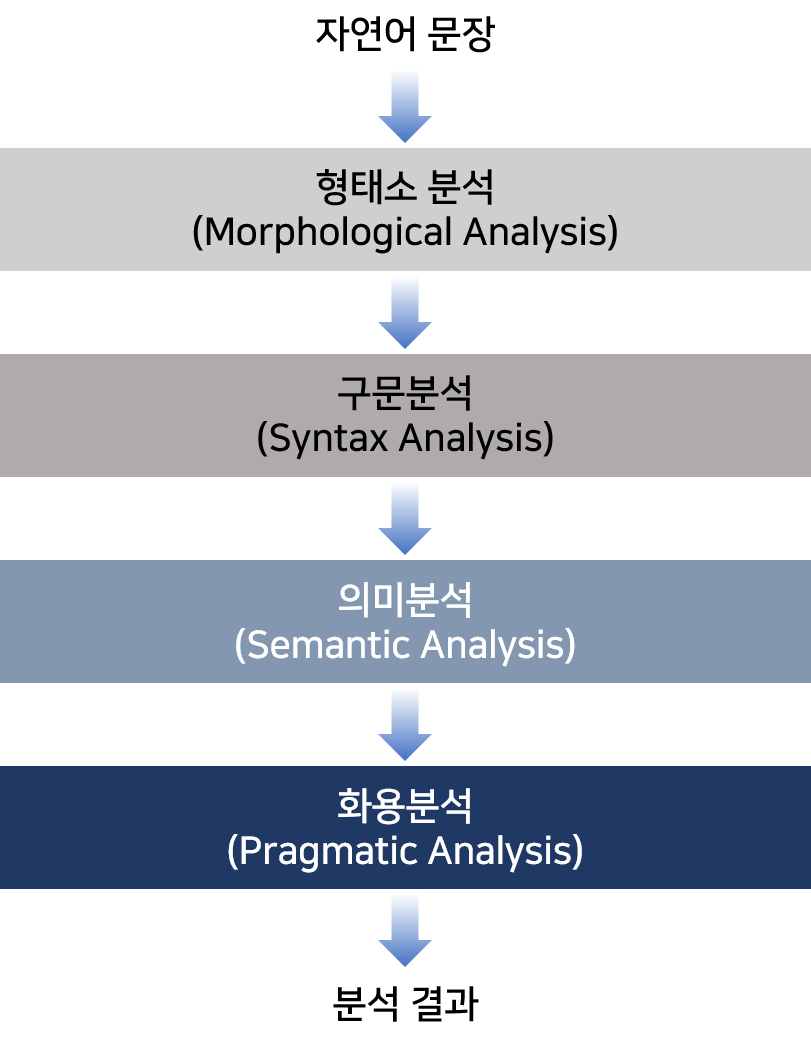

1. 형태소 분석

* 입력된 문자열을 분석하여
형태소(morpheme)라는 최소 의미 단위로 분리

* 사전 정보와 형태소 결합 정보 이용

* 정규 문법(Regular Grammar)으로 분석 가능

* 언어에 따라 난이도가 다름

> 영어, 불어 : 쉬움

> 한국어, 일본어, 아랍어, 터키어 : 어려움

* 정규표현식이란?

> 정규표현식의 사전적인 의미로는 특정한 규칙을 가진 문자열의 집합을 표현하는데 사용하는 형식 언어 

> Programming Language나 Text Editor 등 에서 문자열의 검색과 치환을 위한 용도로사용
 

* 정규 표현식 종류

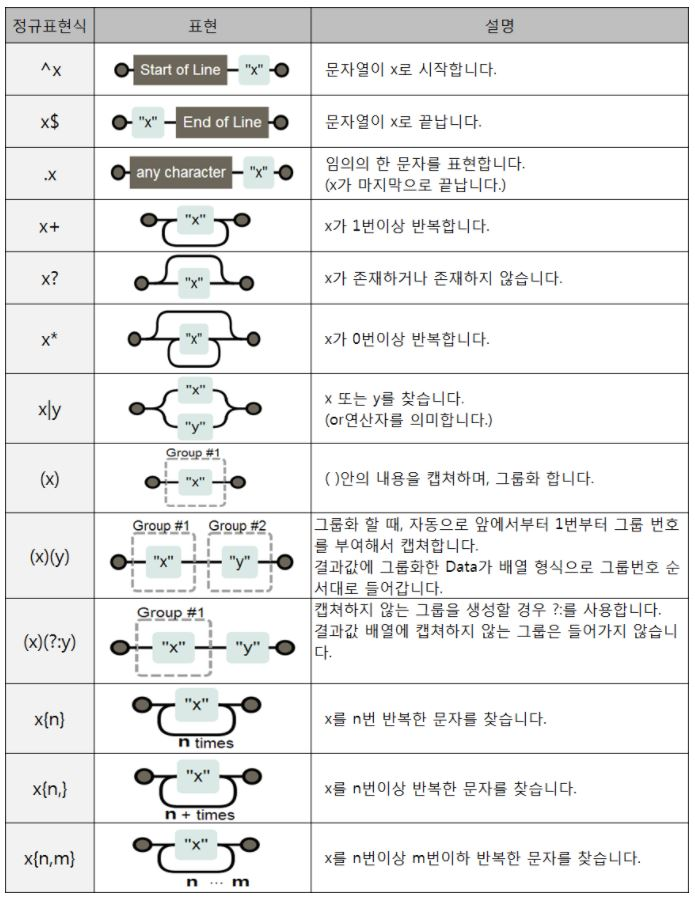

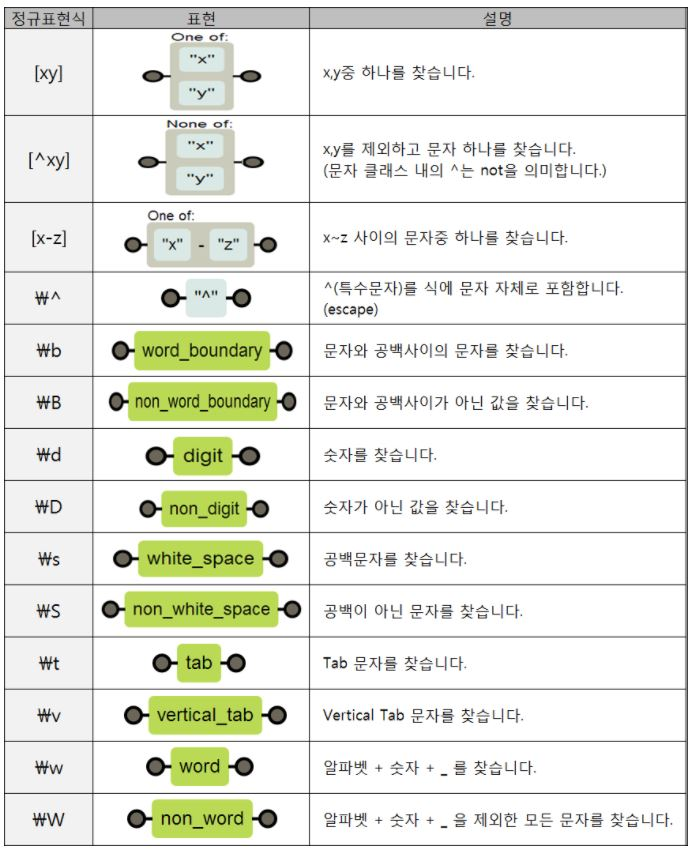

* 정규식 적용 예시

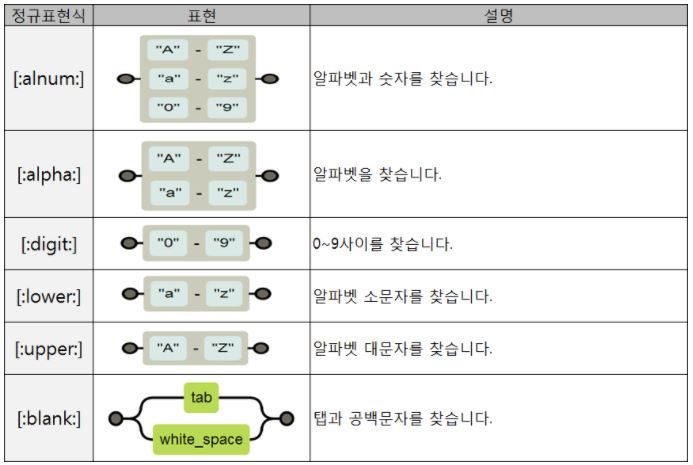

In [ ]:
# 정규식 적용을 위한 라이브러리 호출
import re

# 정규식에서 일치되는 부분 추출
text = 'ㅋㅋㅋ 안녕하세요'
re.compile('[ㄱ-ㅎ]+').findall(text)

In [ ]:
# 정규식에서 일치되지 않는 부분 추출
text = 'ㅋㅋㅋ 안녕하세요'
re.compile('[ㄱ-ㅎ]+').sub("",text)

In [ ]:
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
text = news['본문'][0]
result = hangul.sub('', text)
print('#============================================#')
print('정규식 적용 전')
print('#============================================#')
print(text)
print('#============================================#')
print('정규식 적용 후')
print('#============================================#')
print(result)

* 단어 토큰화:  토큰화(tokenization)란 문장을 토큰(token) 시퀀스로 분절하는 과정을 의미함

> 토큰화를 수행하는 프로그램을 토크나이저(tokenizer)라고함

> 대표적인 한국어 토크나이저로는 꼬꼬마(kkma), 코모란(Komoran)존재 

> 형태소 분석기는 언어 전문가들이 분절 및 태깅해 놓은 데이터를 학습해 최대한 전문가들이 분석해 놓은 결과와 비슷하게 토큰화를 수행함

In [ ]:
text = '자연어처리는 컴퓨터가 인간의 언어를 인식하는 분야입니다'

# 꼬꼬마 형태소분석기 사용
from konlpy.tag import Kkma
kkma = Kkma()

print("명사 : ", kkma.nouns(text))    # 명사
print("형태소 : ", kkma.morphs(text))   # 형태소
print("형태소와 품사 : ", kkma.pos(text))      # 형태소와 품사

In [ ]:
# 코모란 형태소분석기 사용
from konlpy.tag import Komoran
komoran = Komoran()

print(komoran.nouns(text))    # 명사
print(komoran.morphs(text))   # 형태소
print(komoran.pos(text))      # 형태소와 품사

In [ ]:
print("명사 : ", kkma.nouns(result))    # 명사
print("형태소 : ", kkma.morphs(result))   # 형태소
print("형태소와 품사 : ", kkma.pos(result))  # 형태소와 품사

In [ ]:
print(kkma.pos(result)[0][0])
print(kkma.pos(result)[0][1])

In [ ]:
print(kkma.tagset)

In [ ]:
# 명사만 추출
for token in kkma.pos(result):
  print(token)
  if token[1] == 'NNG':
    print(token[0])

In [ ]:
# Token 길이가 2이상 인 단어만 출력
for token in kkma.pos(result):
  if token[1] == 'NNG':
    if len(token[0])>1:
      print(token[0])

In [ ]:
# 데이터 전처리 및 토큰화 
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
token_list = []
for idx, text in enumerate(news['본문']):
  if idx < 1000:
    print('[Progress: {}/{}]'.format((idx+1),1000))
    result = hangul.sub('', text)
    for token in kkma.pos(result):
      if token[1] == 'NNG':
        if len(token[0])>1:
          token_list.append(token[0])

In [ ]:
# 결과확인
token_list[0:20]

In [ ]:
dt_token_list = pd.DataFrame(token_list)[0].value_counts()
dt_token_list

In [ ]:
# dict 형태로 변환하기
word = dict()
for i in range(len(dt_token_list)):
  word.update({list(dt_token_list.index)[i]:dt_token_list.iloc[0]})
print(word)

In [ ]:
# word cloud 만들기
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [ ]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [ ]:
drive_service = google_authenticate()

In [ ]:
def read_file(file_id):

  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

In [ ]:
from PIL import Image
image_file = read_file("1sVG9bZ1LXyreX9SYQ92EbEOd8_Q009bX")

# create mask
image_mask = np.array(Image.open(image_file))

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',mask = image_mask,background_color='white').generate_from_frequencies(word) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 딥러닝 모형을 이용하여 감정분류 해보기

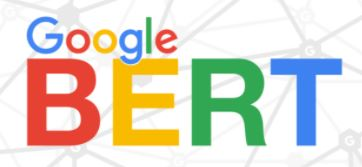

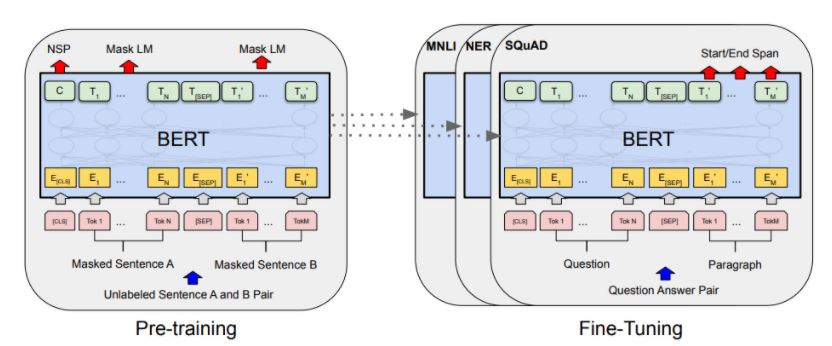

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 8.3 MB/s 
     |████████████████████████████████| 120 kB 54.1 MB/s 
     |████████████████████████████████| 6.6 MB 46.1 MB/s 


In [ ]:
import torch

from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import random
import time
import datetime

In [ ]:
# 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git 

In [ ]:
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t')
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t')

print(train.shape)
print(test.shape)

In [ ]:
train.head()

In [ ]:
# 리뷰 문장 추출
sentences = train['document']
sentences[:10]

BERT 모델 형식

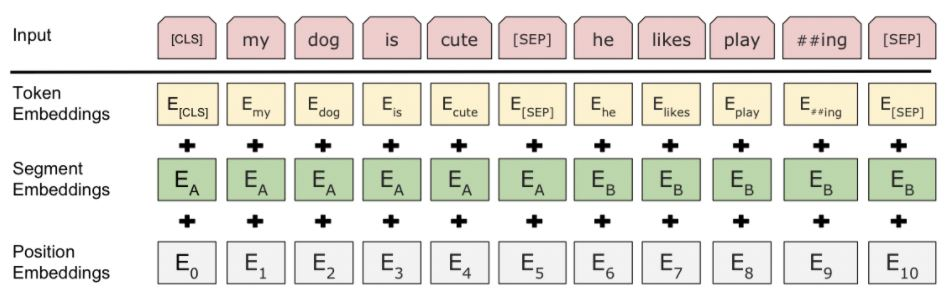

* BERT의 입력은 위의 그림과 같은 형식
* Classification을 뜻하는 [CLS] 심볼이 제일 앞에 삽입
* Fine tunning 시 출력에서 이 위치의 값을 사용하여 분류
* [SEP]은 Seperation을 지칭하며, 두 문장을 구분하는 역할 수행


In [ ]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

In [ ]:
# 라벨 추출
labels = train['label'].values
labels

In [ ]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])

* BERT는 형태소분석으로 토큰을 분리하지 않음 
* WordPiece라는 통계적인 방식을 사용: 한 단어내에서 자주 나오는 글자들을 붙여서 하나의 토큰으로 만들며, 언어에 상관없이 토큰을 생성할 수 있다는 장점있고  신조어 같이 사전에 없는 단어를 처리하기도 용이함

* 위의 결과에서 ## 기호는 앞 토큰과 이어진다는 표시이며, 토크나이저는 여러 언어의 데이터를 기반으로 만든 'bert-base-multilingual-cased'를 사용

* bert-base-multilingual-cased 는 한글어도 지원하고 있음

In [ ]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = 128

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

* 보통 딥러닝 모델에는 토큰 자체를 입력으로 넣을수 없기 때문에, 숫자로 변환하는 것이 필요하며 이과정을 Embedding 이라고 함

* BERT의 토크나이저는 {단어토큰:인덱스}로 구성된 단어사전을 가지고 있으며, 이 단어사전을 참조하여 토큰을 인덱스로 변형시켜줌

In [ ]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

In [ ]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids,
                                                                                    labels, 
                                                                                    random_state=2018, 
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(attention_masks, 
                                                       input_ids,
                                                       random_state=2018, 
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(train_labels)
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(validation_labels)
validation_masks = torch.tensor(validation_masks)				

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

In [ ]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=2)
model.cuda()

In [ ]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 4

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 처음에 학습률을 조금씩 변화시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
# 재현을 위해 랜덤시드 고정
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.cuda() for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.cuda() for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")

In [ ]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = 128

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [ ]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.cuda()
    b_input_mask = masks.cuda()
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [ ]:
logits = test_sentences(['연기는 별로지만 재미 하나는 끝내줌!'])

print(logits)
print(np.argmax(logits))

logits = test_sentences(['주연배우가 아깝다. 총체적 난국...'])

print(np.argmax(logits))


In [ ]:
test = test_sentences([news['본문'][100]])
print(news['본문'][100])
print(np.argmax(test))

[과제] News 데이터를 이용하여 텍스트 분석 수행해보기
1. 강의 중 배운 텍스트 분석 기법을 적용해보고, 워드 클라우드를 출력하여 제출하기
2. 학습한 bert 모델에 News 데이터를 넣어 결과를 도출하기, (학습 데이터에 출력된 결과를 merging 하여 제출)
